In [1]:
import os
import torch 
import torch.nn as nn
import torchvision
import numpy as np
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable
from dataset import *
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt

In [2]:
learning_rate=1e-3
batch_size=128
num_epochs=300

In [14]:
composed = transforms.Compose([ToTensor()])
train_dataset=ImageDataset(path="./fer2013_features/Training",transform=composed)
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)

validate_dataset=ImageDataset(path="./fer2013_features/PublicTest",transform=composed)
validate_loader=DataLoader(validate_dataset,batch_size=batch_size,shuffle=True)

test_dataset=ImageDataset(path="./fer2013_features/PrivateTest",transform=composed)
test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=True)


In [4]:
#model
class Model(nn.Module):
    def __init__(self,drop_rate=0.5):
        super(Model, self).__init__()
        self.image_conv = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=3,stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=3,stride=2),
            
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=3,stride=2))
        self.image_fc = nn.Sequential(
            nn.Dropout(drop_rate),
            nn.Linear(5*5*256, 4096),
            nn.ReLU(),
            nn.Dropout(drop_rate),
            nn.Linear(4096, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Linear(1024, 128),
            nn.ReLU())
        
        self.landmark_fc = nn.Sequential(
            nn.Linear(2592, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Linear(1024, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128))
        self.fc=nn.Sequential(
            nn.Linear(256,7))
#             nn.Softmax())
    def forward(self, image,hog_feature,batch_size):
        #image
        image_out = self.image_conv(image)
#         print("after iamge conv : ",image_out.shape)
        image_out=image_out.view(batch_size,-1)
#         print("before image fc : ",image_out.shape)
        image_out=self.image_fc(image_out)
#         print("after image fc : ", image_out.shape)
        #hog_feature
        hog_out = self.landmark_fc(hog_feature)
#         print("after hog_fc : ",hog_out.shape)
        out = torch.cat((image_out,hog_out),1)
#         print("total shape : ",out.shape)
        out = self.fc(out)
        return out


In [5]:
model=Model(drop_rate=0.5).cuda()

In [6]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# For updating learning rate
def update_lr(optimizer, lr):    
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

Epoch [1/300], Step [100/225], Loss: 1.4938
Epoch [1/300], Step [200/225], Loss: 1.1911
Epoch [2/300], Step [100/225], Loss: 1.2515
Epoch [2/300], Step [200/225], Loss: 1.2251
Epoch [3/300], Step [100/225], Loss: 1.0565
Epoch [3/300], Step [200/225], Loss: 1.1073
Epoch [4/300], Step [100/225], Loss: 0.9575
Epoch [4/300], Step [200/225], Loss: 1.0961
Epoch [5/300], Step [100/225], Loss: 0.8727
Epoch [5/300], Step [200/225], Loss: 0.9639
Epoch [6/300], Step [100/225], Loss: 0.7368
Epoch [6/300], Step [200/225], Loss: 0.9729
Epoch [7/300], Step [100/225], Loss: 0.8446
Epoch [7/300], Step [200/225], Loss: 0.8174
Epoch [8/300], Step [100/225], Loss: 0.7001
Epoch [8/300], Step [200/225], Loss: 0.7862
Epoch [9/300], Step [100/225], Loss: 0.7201
Epoch [9/300], Step [200/225], Loss: 0.6218
Epoch [10/300], Step [100/225], Loss: 0.4454
Epoch [10/300], Step [200/225], Loss: 0.4000
Epoch [11/300], Step [100/225], Loss: 0.4054
Epoch [11/300], Step [200/225], Loss: 0.4094
Epoch [12/300], Step [100/22

Epoch [92/300], Step [100/225], Loss: 0.5246
Epoch [92/300], Step [200/225], Loss: 0.4602
Epoch [93/300], Step [100/225], Loss: 0.5172
Epoch [93/300], Step [200/225], Loss: 0.4343
Epoch [94/300], Step [100/225], Loss: 0.5114
Epoch [94/300], Step [200/225], Loss: 0.4495
Epoch [95/300], Step [100/225], Loss: 0.4204
Epoch [95/300], Step [200/225], Loss: 0.5211
Epoch [96/300], Step [100/225], Loss: 0.3849
Epoch [96/300], Step [200/225], Loss: 0.5491
Epoch [97/300], Step [100/225], Loss: 0.4356
Epoch [97/300], Step [200/225], Loss: 0.4544
Epoch [98/300], Step [100/225], Loss: 0.3631
Epoch [98/300], Step [200/225], Loss: 0.5739
Epoch [99/300], Step [100/225], Loss: 0.4311
Epoch [99/300], Step [200/225], Loss: 0.4177
Epoch [100/300], Step [100/225], Loss: 0.4306
Epoch [100/300], Step [200/225], Loss: 0.6161
Epoch [101/300], Step [100/225], Loss: 0.4586
Epoch [101/300], Step [200/225], Loss: 0.4536
Epoch [102/300], Step [100/225], Loss: 0.4456
Epoch [102/300], Step [200/225], Loss: 0.4626
Epoc

Epoch [181/300], Step [100/225], Loss: 0.4256
Epoch [181/300], Step [200/225], Loss: 0.5204
Epoch [182/300], Step [100/225], Loss: 0.3624
Epoch [182/300], Step [200/225], Loss: 0.4413
Epoch [183/300], Step [100/225], Loss: 0.4616
Epoch [183/300], Step [200/225], Loss: 0.3144
Epoch [184/300], Step [100/225], Loss: 0.3742
Epoch [184/300], Step [200/225], Loss: 0.5571
Epoch [185/300], Step [100/225], Loss: 0.4525
Epoch [185/300], Step [200/225], Loss: 0.4082
Epoch [186/300], Step [100/225], Loss: 0.5049
Epoch [186/300], Step [200/225], Loss: 0.4100
Epoch [187/300], Step [100/225], Loss: 0.4756
Epoch [187/300], Step [200/225], Loss: 0.5198
Epoch [188/300], Step [100/225], Loss: 0.5249
Epoch [188/300], Step [200/225], Loss: 0.5014
Epoch [189/300], Step [100/225], Loss: 0.3749
Epoch [189/300], Step [200/225], Loss: 0.5444
Epoch [190/300], Step [100/225], Loss: 0.4626
Epoch [190/300], Step [200/225], Loss: 0.5231
Epoch [191/300], Step [100/225], Loss: 0.4098
Epoch [191/300], Step [200/225], L

Epoch [270/300], Step [100/225], Loss: 0.4783
Epoch [270/300], Step [200/225], Loss: 0.5066
Epoch [271/300], Step [100/225], Loss: 0.4524
Epoch [271/300], Step [200/225], Loss: 0.5323
Epoch [272/300], Step [100/225], Loss: 0.4373
Epoch [272/300], Step [200/225], Loss: 0.4034
Epoch [273/300], Step [100/225], Loss: 0.3608
Epoch [273/300], Step [200/225], Loss: 0.4784
Epoch [274/300], Step [100/225], Loss: 0.3901
Epoch [274/300], Step [200/225], Loss: 0.5306
Epoch [275/300], Step [100/225], Loss: 0.4601
Epoch [275/300], Step [200/225], Loss: 0.4704
Epoch [276/300], Step [100/225], Loss: 0.5104
Epoch [276/300], Step [200/225], Loss: 0.5022
Epoch [277/300], Step [100/225], Loss: 0.4699
Epoch [277/300], Step [200/225], Loss: 0.4836
Epoch [278/300], Step [100/225], Loss: 0.4046
Epoch [278/300], Step [200/225], Loss: 0.4267
Epoch [279/300], Step [100/225], Loss: 0.5263
Epoch [279/300], Step [200/225], Loss: 0.3974
Epoch [280/300], Step [100/225], Loss: 0.4597
Epoch [280/300], Step [200/225], L

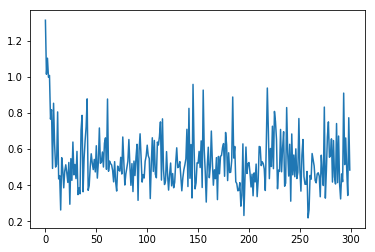

In [7]:

# Train the model
curr_lr = learning_rate

x=[]
y=[]
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels,_,hog_features) in enumerate(train_loader):
#         if (i+1) % 200 == 0:
#             print(images.shape,hog_features.shape)
        batch=len(images)
        
        images=images.cuda()
        labels=labels.cuda()
        hog_features=hog_features.cuda()
        
        outputs = model(images,hog_features,batch)
#         _, predicted = torch.max(outputs.data, 1)
#         print(outputs[0],labels[0])
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        # Decay learning rate
        if (epoch+1) % 10 == 0:
            curr_lr /= 2
            update_lr(optimizer, curr_lr)
            torch.save(model.state_dict(), 'model_training.ckpt')
    x.append(epoch)
    y.append(loss.item())
plt.plot(x,y)
plt.show()
torch.save(model.state_dict(), 'model_training.ckpt')

del model, images, labels, hog_features

Epoch [1/300], Step [1/29], Loss: 1.2348
Epoch [1/300], Step [2/29], Loss: 1.2332
Epoch [1/300], Step [3/29], Loss: 1.2959
Epoch [1/300], Step [4/29], Loss: 1.2158
Epoch [1/300], Step [5/29], Loss: 1.5669
Epoch [1/300], Step [6/29], Loss: 1.3031
Epoch [1/300], Step [7/29], Loss: 1.2099
Epoch [1/300], Step [8/29], Loss: 1.2346
Epoch [1/300], Step [9/29], Loss: 1.4178
Epoch [1/300], Step [10/29], Loss: 1.3104
Epoch [1/300], Step [11/29], Loss: 1.5452
Epoch [1/300], Step [12/29], Loss: 1.2407
Epoch [1/300], Step [13/29], Loss: 1.1656
Epoch [1/300], Step [14/29], Loss: 1.1953
Epoch [1/300], Step [15/29], Loss: 0.9787
Epoch [1/300], Step [16/29], Loss: 1.2298
Epoch [1/300], Step [17/29], Loss: 1.2045
Epoch [1/300], Step [18/29], Loss: 1.2125
Epoch [1/300], Step [19/29], Loss: 1.4532
Epoch [1/300], Step [20/29], Loss: 1.5535
Epoch [1/300], Step [21/29], Loss: 1.3904
Epoch [1/300], Step [22/29], Loss: 1.2996
Epoch [1/300], Step [23/29], Loss: 1.4415
Epoch [1/300], Step [24/29], Loss: 1.4114
E

Epoch [7/300], Step [23/29], Loss: 1.3143
Epoch [7/300], Step [24/29], Loss: 1.5447
Epoch [7/300], Step [25/29], Loss: 1.3360
Epoch [7/300], Step [26/29], Loss: 1.5849
Epoch [7/300], Step [27/29], Loss: 1.2392
Epoch [7/300], Step [28/29], Loss: 1.0443
Epoch [7/300], Step [29/29], Loss: 4.7120
Epoch [8/300], Step [1/29], Loss: 1.2748
Epoch [8/300], Step [2/29], Loss: 1.3943
Epoch [8/300], Step [3/29], Loss: 1.5148
Epoch [8/300], Step [4/29], Loss: 1.2811
Epoch [8/300], Step [5/29], Loss: 1.3586
Epoch [8/300], Step [6/29], Loss: 1.3146
Epoch [8/300], Step [7/29], Loss: 1.4198
Epoch [8/300], Step [8/29], Loss: 1.0863
Epoch [8/300], Step [9/29], Loss: 1.4448
Epoch [8/300], Step [10/29], Loss: 1.2421
Epoch [8/300], Step [11/29], Loss: 0.9365
Epoch [8/300], Step [12/29], Loss: 1.4601
Epoch [8/300], Step [13/29], Loss: 1.3129
Epoch [8/300], Step [14/29], Loss: 1.2182
Epoch [8/300], Step [15/29], Loss: 1.3724
Epoch [8/300], Step [16/29], Loss: 1.1003
Epoch [8/300], Step [17/29], Loss: 1.1831
E

Epoch [14/300], Step [13/29], Loss: 1.3361
Epoch [14/300], Step [14/29], Loss: 1.4433
Epoch [14/300], Step [15/29], Loss: 1.4490
Epoch [14/300], Step [16/29], Loss: 1.2924
Epoch [14/300], Step [17/29], Loss: 1.3262
Epoch [14/300], Step [18/29], Loss: 1.4027
Epoch [14/300], Step [19/29], Loss: 1.3442
Epoch [14/300], Step [20/29], Loss: 1.3795
Epoch [14/300], Step [21/29], Loss: 1.3116
Epoch [14/300], Step [22/29], Loss: 1.0071
Epoch [14/300], Step [23/29], Loss: 1.4567
Epoch [14/300], Step [24/29], Loss: 1.3693
Epoch [14/300], Step [25/29], Loss: 1.0610
Epoch [14/300], Step [26/29], Loss: 1.2301
Epoch [14/300], Step [27/29], Loss: 1.1959
Epoch [14/300], Step [28/29], Loss: 1.3383
Epoch [14/300], Step [29/29], Loss: 1.6856
Epoch [15/300], Step [1/29], Loss: 1.4193
Epoch [15/300], Step [2/29], Loss: 1.2162
Epoch [15/300], Step [3/29], Loss: 1.3700
Epoch [15/300], Step [4/29], Loss: 1.4245
Epoch [15/300], Step [5/29], Loss: 0.9123
Epoch [15/300], Step [6/29], Loss: 1.3893
Epoch [15/300], S

Epoch [21/300], Step [1/29], Loss: 1.3517
Epoch [21/300], Step [2/29], Loss: 1.3144
Epoch [21/300], Step [3/29], Loss: 1.3266
Epoch [21/300], Step [4/29], Loss: 1.1300
Epoch [21/300], Step [5/29], Loss: 1.2400
Epoch [21/300], Step [6/29], Loss: 1.2839
Epoch [21/300], Step [7/29], Loss: 1.1822
Epoch [21/300], Step [8/29], Loss: 1.3052
Epoch [21/300], Step [9/29], Loss: 1.4266
Epoch [21/300], Step [10/29], Loss: 1.4071
Epoch [21/300], Step [11/29], Loss: 1.3331
Epoch [21/300], Step [12/29], Loss: 1.4272
Epoch [21/300], Step [13/29], Loss: 0.9486
Epoch [21/300], Step [14/29], Loss: 1.4996
Epoch [21/300], Step [15/29], Loss: 1.2539
Epoch [21/300], Step [16/29], Loss: 1.4329
Epoch [21/300], Step [17/29], Loss: 1.3642
Epoch [21/300], Step [18/29], Loss: 1.2706
Epoch [21/300], Step [19/29], Loss: 1.3980
Epoch [21/300], Step [20/29], Loss: 1.3921
Epoch [21/300], Step [21/29], Loss: 1.1221
Epoch [21/300], Step [22/29], Loss: 1.1559
Epoch [21/300], Step [23/29], Loss: 1.2513
Epoch [21/300], Step

Epoch [27/300], Step [19/29], Loss: 1.5007
Epoch [27/300], Step [20/29], Loss: 1.2886
Epoch [27/300], Step [21/29], Loss: 1.0714
Epoch [27/300], Step [22/29], Loss: 1.3707
Epoch [27/300], Step [23/29], Loss: 1.3179
Epoch [27/300], Step [24/29], Loss: 1.2923
Epoch [27/300], Step [25/29], Loss: 1.1597
Epoch [27/300], Step [26/29], Loss: 1.3015
Epoch [27/300], Step [27/29], Loss: 1.3121
Epoch [27/300], Step [28/29], Loss: 1.2056
Epoch [27/300], Step [29/29], Loss: 1.5996
Epoch [28/300], Step [1/29], Loss: 1.3486
Epoch [28/300], Step [2/29], Loss: 1.1710
Epoch [28/300], Step [3/29], Loss: 1.4043
Epoch [28/300], Step [4/29], Loss: 1.3039
Epoch [28/300], Step [5/29], Loss: 1.4908
Epoch [28/300], Step [6/29], Loss: 1.4124
Epoch [28/300], Step [7/29], Loss: 1.1557
Epoch [28/300], Step [8/29], Loss: 1.3351
Epoch [28/300], Step [9/29], Loss: 1.2671
Epoch [28/300], Step [10/29], Loss: 1.2637
Epoch [28/300], Step [11/29], Loss: 1.1148
Epoch [28/300], Step [12/29], Loss: 1.3539
Epoch [28/300], Step

Epoch [34/300], Step [7/29], Loss: 1.4658
Epoch [34/300], Step [8/29], Loss: 1.3689
Epoch [34/300], Step [9/29], Loss: 1.4243
Epoch [34/300], Step [10/29], Loss: 1.4695
Epoch [34/300], Step [11/29], Loss: 1.5179
Epoch [34/300], Step [12/29], Loss: 1.1592
Epoch [34/300], Step [13/29], Loss: 1.2742
Epoch [34/300], Step [14/29], Loss: 1.2115
Epoch [34/300], Step [15/29], Loss: 1.2734
Epoch [34/300], Step [16/29], Loss: 1.4523
Epoch [34/300], Step [17/29], Loss: 1.3452
Epoch [34/300], Step [18/29], Loss: 1.2491
Epoch [34/300], Step [19/29], Loss: 1.0560
Epoch [34/300], Step [20/29], Loss: 1.4785
Epoch [34/300], Step [21/29], Loss: 1.2710
Epoch [34/300], Step [22/29], Loss: 1.1944
Epoch [34/300], Step [23/29], Loss: 1.1817
Epoch [34/300], Step [24/29], Loss: 1.0639
Epoch [34/300], Step [25/29], Loss: 1.3069
Epoch [34/300], Step [26/29], Loss: 1.2563
Epoch [34/300], Step [27/29], Loss: 1.2284
Epoch [34/300], Step [28/29], Loss: 1.3024
Epoch [34/300], Step [29/29], Loss: 0.7850
Epoch [35/300]

Epoch [40/300], Step [24/29], Loss: 1.4545
Epoch [40/300], Step [25/29], Loss: 1.2671
Epoch [40/300], Step [26/29], Loss: 1.1412
Epoch [40/300], Step [27/29], Loss: 1.2863
Epoch [40/300], Step [28/29], Loss: 1.2051
Epoch [40/300], Step [29/29], Loss: 1.7996
Epoch [41/300], Step [1/29], Loss: 1.1272
Epoch [41/300], Step [2/29], Loss: 1.2357
Epoch [41/300], Step [3/29], Loss: 1.7859
Epoch [41/300], Step [4/29], Loss: 1.3081
Epoch [41/300], Step [5/29], Loss: 1.1541
Epoch [41/300], Step [6/29], Loss: 1.5719
Epoch [41/300], Step [7/29], Loss: 1.1841
Epoch [41/300], Step [8/29], Loss: 1.1843
Epoch [41/300], Step [9/29], Loss: 1.4533
Epoch [41/300], Step [10/29], Loss: 1.2888
Epoch [41/300], Step [11/29], Loss: 1.3677
Epoch [41/300], Step [12/29], Loss: 1.3209
Epoch [41/300], Step [13/29], Loss: 1.0425
Epoch [41/300], Step [14/29], Loss: 1.1043
Epoch [41/300], Step [15/29], Loss: 1.3898
Epoch [41/300], Step [16/29], Loss: 1.3379
Epoch [41/300], Step [17/29], Loss: 1.4197
Epoch [41/300], Step

Epoch [47/300], Step [13/29], Loss: 1.4512
Epoch [47/300], Step [14/29], Loss: 1.2821
Epoch [47/300], Step [15/29], Loss: 1.3218
Epoch [47/300], Step [16/29], Loss: 1.3775
Epoch [47/300], Step [17/29], Loss: 1.1985
Epoch [47/300], Step [18/29], Loss: 1.1354
Epoch [47/300], Step [19/29], Loss: 1.2544
Epoch [47/300], Step [20/29], Loss: 1.5297
Epoch [47/300], Step [21/29], Loss: 1.1283
Epoch [47/300], Step [22/29], Loss: 1.1691
Epoch [47/300], Step [23/29], Loss: 1.0957
Epoch [47/300], Step [24/29], Loss: 1.2593
Epoch [47/300], Step [25/29], Loss: 1.0563
Epoch [47/300], Step [26/29], Loss: 1.4063
Epoch [47/300], Step [27/29], Loss: 1.1061
Epoch [47/300], Step [28/29], Loss: 1.4013
Epoch [47/300], Step [29/29], Loss: 1.8770
Epoch [48/300], Step [1/29], Loss: 1.3277
Epoch [48/300], Step [2/29], Loss: 1.1654
Epoch [48/300], Step [3/29], Loss: 1.2454
Epoch [48/300], Step [4/29], Loss: 1.2599
Epoch [48/300], Step [5/29], Loss: 1.2644
Epoch [48/300], Step [6/29], Loss: 1.5409
Epoch [48/300], S

Epoch [54/300], Step [1/29], Loss: 1.3841
Epoch [54/300], Step [2/29], Loss: 1.1134
Epoch [54/300], Step [3/29], Loss: 1.3749
Epoch [54/300], Step [4/29], Loss: 1.2420
Epoch [54/300], Step [5/29], Loss: 1.2220
Epoch [54/300], Step [6/29], Loss: 1.1283
Epoch [54/300], Step [7/29], Loss: 1.2452
Epoch [54/300], Step [8/29], Loss: 1.4063
Epoch [54/300], Step [9/29], Loss: 1.2479
Epoch [54/300], Step [10/29], Loss: 1.2737
Epoch [54/300], Step [11/29], Loss: 1.2220
Epoch [54/300], Step [12/29], Loss: 1.5032
Epoch [54/300], Step [13/29], Loss: 1.4470
Epoch [54/300], Step [14/29], Loss: 1.1966
Epoch [54/300], Step [15/29], Loss: 1.3008
Epoch [54/300], Step [16/29], Loss: 1.4796
Epoch [54/300], Step [17/29], Loss: 1.3753
Epoch [54/300], Step [18/29], Loss: 1.2887
Epoch [54/300], Step [19/29], Loss: 1.1276
Epoch [54/300], Step [20/29], Loss: 1.3515
Epoch [54/300], Step [21/29], Loss: 1.4265
Epoch [54/300], Step [22/29], Loss: 1.5849
Epoch [54/300], Step [23/29], Loss: 0.9961
Epoch [54/300], Step

Epoch [60/300], Step [19/29], Loss: 1.2975
Epoch [60/300], Step [20/29], Loss: 1.0586
Epoch [60/300], Step [21/29], Loss: 1.1902
Epoch [60/300], Step [22/29], Loss: 1.4284
Epoch [60/300], Step [23/29], Loss: 1.3470
Epoch [60/300], Step [24/29], Loss: 1.3252
Epoch [60/300], Step [25/29], Loss: 1.5207
Epoch [60/300], Step [26/29], Loss: 1.0952
Epoch [60/300], Step [27/29], Loss: 1.3852
Epoch [60/300], Step [28/29], Loss: 1.3536
Epoch [60/300], Step [29/29], Loss: 0.6745
Epoch [61/300], Step [1/29], Loss: 1.1419
Epoch [61/300], Step [2/29], Loss: 1.7277
Epoch [61/300], Step [3/29], Loss: 1.3932
Epoch [61/300], Step [4/29], Loss: 1.1016
Epoch [61/300], Step [5/29], Loss: 1.4529
Epoch [61/300], Step [6/29], Loss: 1.3432
Epoch [61/300], Step [7/29], Loss: 1.2111
Epoch [61/300], Step [8/29], Loss: 1.3217
Epoch [61/300], Step [9/29], Loss: 0.9494
Epoch [61/300], Step [10/29], Loss: 1.4122
Epoch [61/300], Step [11/29], Loss: 1.0756
Epoch [61/300], Step [12/29], Loss: 1.1176
Epoch [61/300], Step

Epoch [67/300], Step [7/29], Loss: 1.4170
Epoch [67/300], Step [8/29], Loss: 1.5201
Epoch [67/300], Step [9/29], Loss: 1.1105
Epoch [67/300], Step [10/29], Loss: 1.3726
Epoch [67/300], Step [11/29], Loss: 1.1764
Epoch [67/300], Step [12/29], Loss: 1.1782
Epoch [67/300], Step [13/29], Loss: 1.4258
Epoch [67/300], Step [14/29], Loss: 1.1940
Epoch [67/300], Step [15/29], Loss: 1.2903
Epoch [67/300], Step [16/29], Loss: 1.2436
Epoch [67/300], Step [17/29], Loss: 1.3555
Epoch [67/300], Step [18/29], Loss: 1.3118
Epoch [67/300], Step [19/29], Loss: 1.2836
Epoch [67/300], Step [20/29], Loss: 1.3305
Epoch [67/300], Step [21/29], Loss: 1.2951
Epoch [67/300], Step [22/29], Loss: 1.3800
Epoch [67/300], Step [23/29], Loss: 1.0052
Epoch [67/300], Step [24/29], Loss: 1.1455
Epoch [67/300], Step [25/29], Loss: 1.1557
Epoch [67/300], Step [26/29], Loss: 1.5299
Epoch [67/300], Step [27/29], Loss: 1.5383
Epoch [67/300], Step [28/29], Loss: 1.3704
Epoch [67/300], Step [29/29], Loss: 1.1170
Epoch [68/300]

Epoch [73/300], Step [24/29], Loss: 1.2814
Epoch [73/300], Step [25/29], Loss: 1.3818
Epoch [73/300], Step [26/29], Loss: 1.2440
Epoch [73/300], Step [27/29], Loss: 1.4361
Epoch [73/300], Step [28/29], Loss: 1.0812
Epoch [73/300], Step [29/29], Loss: 2.9485
Epoch [74/300], Step [1/29], Loss: 1.2164
Epoch [74/300], Step [2/29], Loss: 1.4202
Epoch [74/300], Step [3/29], Loss: 1.0994
Epoch [74/300], Step [4/29], Loss: 1.4771
Epoch [74/300], Step [5/29], Loss: 1.2380
Epoch [74/300], Step [6/29], Loss: 1.5143
Epoch [74/300], Step [7/29], Loss: 0.9739
Epoch [74/300], Step [8/29], Loss: 1.4289
Epoch [74/300], Step [9/29], Loss: 1.3295
Epoch [74/300], Step [10/29], Loss: 1.4879
Epoch [74/300], Step [11/29], Loss: 1.1469
Epoch [74/300], Step [12/29], Loss: 1.1292
Epoch [74/300], Step [13/29], Loss: 1.0354
Epoch [74/300], Step [14/29], Loss: 1.4753
Epoch [74/300], Step [15/29], Loss: 1.1215
Epoch [74/300], Step [16/29], Loss: 1.4838
Epoch [74/300], Step [17/29], Loss: 1.2187
Epoch [74/300], Step

Epoch [80/300], Step [13/29], Loss: 1.3811
Epoch [80/300], Step [14/29], Loss: 1.3228
Epoch [80/300], Step [15/29], Loss: 1.1600
Epoch [80/300], Step [16/29], Loss: 1.1064
Epoch [80/300], Step [17/29], Loss: 1.3052
Epoch [80/300], Step [18/29], Loss: 1.2643
Epoch [80/300], Step [19/29], Loss: 1.2315
Epoch [80/300], Step [20/29], Loss: 1.3884
Epoch [80/300], Step [21/29], Loss: 1.1562
Epoch [80/300], Step [22/29], Loss: 1.4323
Epoch [80/300], Step [23/29], Loss: 1.1780
Epoch [80/300], Step [24/29], Loss: 1.3188
Epoch [80/300], Step [25/29], Loss: 1.4011
Epoch [80/300], Step [26/29], Loss: 1.2224
Epoch [80/300], Step [27/29], Loss: 0.9934
Epoch [80/300], Step [28/29], Loss: 1.4487
Epoch [80/300], Step [29/29], Loss: 1.2287
Epoch [81/300], Step [1/29], Loss: 1.2088
Epoch [81/300], Step [2/29], Loss: 1.5076
Epoch [81/300], Step [3/29], Loss: 1.2551
Epoch [81/300], Step [4/29], Loss: 1.3006
Epoch [81/300], Step [5/29], Loss: 1.2748
Epoch [81/300], Step [6/29], Loss: 1.0444
Epoch [81/300], S

Epoch [87/300], Step [1/29], Loss: 1.2169
Epoch [87/300], Step [2/29], Loss: 1.1071
Epoch [87/300], Step [3/29], Loss: 1.4939
Epoch [87/300], Step [4/29], Loss: 1.6895
Epoch [87/300], Step [5/29], Loss: 1.0233
Epoch [87/300], Step [6/29], Loss: 1.1701
Epoch [87/300], Step [7/29], Loss: 1.4676
Epoch [87/300], Step [8/29], Loss: 1.2892
Epoch [87/300], Step [9/29], Loss: 1.5692
Epoch [87/300], Step [10/29], Loss: 1.2492
Epoch [87/300], Step [11/29], Loss: 1.3693
Epoch [87/300], Step [12/29], Loss: 1.3667
Epoch [87/300], Step [13/29], Loss: 1.0414
Epoch [87/300], Step [14/29], Loss: 1.2318
Epoch [87/300], Step [15/29], Loss: 1.1422
Epoch [87/300], Step [16/29], Loss: 1.2246
Epoch [87/300], Step [17/29], Loss: 1.1998
Epoch [87/300], Step [18/29], Loss: 1.1019
Epoch [87/300], Step [19/29], Loss: 1.4032
Epoch [87/300], Step [20/29], Loss: 1.4866
Epoch [87/300], Step [21/29], Loss: 1.5518
Epoch [87/300], Step [22/29], Loss: 1.3223
Epoch [87/300], Step [23/29], Loss: 1.3967
Epoch [87/300], Step

Epoch [93/300], Step [19/29], Loss: 1.3403
Epoch [93/300], Step [20/29], Loss: 1.1206
Epoch [93/300], Step [21/29], Loss: 1.5059
Epoch [93/300], Step [22/29], Loss: 1.3344
Epoch [93/300], Step [23/29], Loss: 1.3062
Epoch [93/300], Step [24/29], Loss: 1.3466
Epoch [93/300], Step [25/29], Loss: 1.3788
Epoch [93/300], Step [26/29], Loss: 1.2408
Epoch [93/300], Step [27/29], Loss: 1.4001
Epoch [93/300], Step [28/29], Loss: 1.3582
Epoch [93/300], Step [29/29], Loss: 1.0589
Epoch [94/300], Step [1/29], Loss: 1.5141
Epoch [94/300], Step [2/29], Loss: 1.2872
Epoch [94/300], Step [3/29], Loss: 1.1319
Epoch [94/300], Step [4/29], Loss: 1.2522
Epoch [94/300], Step [5/29], Loss: 1.2487
Epoch [94/300], Step [6/29], Loss: 1.1772
Epoch [94/300], Step [7/29], Loss: 1.6032
Epoch [94/300], Step [8/29], Loss: 1.4412
Epoch [94/300], Step [9/29], Loss: 1.0480
Epoch [94/300], Step [10/29], Loss: 1.2567
Epoch [94/300], Step [11/29], Loss: 1.3067
Epoch [94/300], Step [12/29], Loss: 1.3058
Epoch [94/300], Step

Epoch [100/300], Step [7/29], Loss: 1.4861
Epoch [100/300], Step [8/29], Loss: 1.4981
Epoch [100/300], Step [9/29], Loss: 1.1947
Epoch [100/300], Step [10/29], Loss: 1.4238
Epoch [100/300], Step [11/29], Loss: 1.2039
Epoch [100/300], Step [12/29], Loss: 1.1547
Epoch [100/300], Step [13/29], Loss: 1.3896
Epoch [100/300], Step [14/29], Loss: 0.9847
Epoch [100/300], Step [15/29], Loss: 0.9986
Epoch [100/300], Step [16/29], Loss: 1.2340
Epoch [100/300], Step [17/29], Loss: 1.3654
Epoch [100/300], Step [18/29], Loss: 1.5538
Epoch [100/300], Step [19/29], Loss: 1.4033
Epoch [100/300], Step [20/29], Loss: 0.9832
Epoch [100/300], Step [21/29], Loss: 1.3372
Epoch [100/300], Step [22/29], Loss: 1.2223
Epoch [100/300], Step [23/29], Loss: 1.2434
Epoch [100/300], Step [24/29], Loss: 1.3808
Epoch [100/300], Step [25/29], Loss: 1.2791
Epoch [100/300], Step [26/29], Loss: 1.2000
Epoch [100/300], Step [27/29], Loss: 1.2977
Epoch [100/300], Step [28/29], Loss: 1.0474
Epoch [100/300], Step [29/29], Loss

Epoch [106/300], Step [20/29], Loss: 1.3347
Epoch [106/300], Step [21/29], Loss: 1.4552
Epoch [106/300], Step [22/29], Loss: 1.2174
Epoch [106/300], Step [23/29], Loss: 1.2738
Epoch [106/300], Step [24/29], Loss: 1.3430
Epoch [106/300], Step [25/29], Loss: 1.1445
Epoch [106/300], Step [26/29], Loss: 1.2432
Epoch [106/300], Step [27/29], Loss: 1.0796
Epoch [106/300], Step [28/29], Loss: 1.2470
Epoch [106/300], Step [29/29], Loss: 1.0625
Epoch [107/300], Step [1/29], Loss: 1.2395
Epoch [107/300], Step [2/29], Loss: 1.2911
Epoch [107/300], Step [3/29], Loss: 1.2878
Epoch [107/300], Step [4/29], Loss: 1.3573
Epoch [107/300], Step [5/29], Loss: 1.0245
Epoch [107/300], Step [6/29], Loss: 1.1193
Epoch [107/300], Step [7/29], Loss: 1.2260
Epoch [107/300], Step [8/29], Loss: 1.6625
Epoch [107/300], Step [9/29], Loss: 1.0722
Epoch [107/300], Step [10/29], Loss: 1.1078
Epoch [107/300], Step [11/29], Loss: 1.0206
Epoch [107/300], Step [12/29], Loss: 1.3276
Epoch [107/300], Step [13/29], Loss: 1.27

Epoch [113/300], Step [4/29], Loss: 1.3548
Epoch [113/300], Step [5/29], Loss: 1.1897
Epoch [113/300], Step [6/29], Loss: 1.4380
Epoch [113/300], Step [7/29], Loss: 1.4187
Epoch [113/300], Step [8/29], Loss: 1.1711
Epoch [113/300], Step [9/29], Loss: 1.6565
Epoch [113/300], Step [10/29], Loss: 1.2794
Epoch [113/300], Step [11/29], Loss: 1.4012
Epoch [113/300], Step [12/29], Loss: 1.1640
Epoch [113/300], Step [13/29], Loss: 1.1849
Epoch [113/300], Step [14/29], Loss: 1.3194
Epoch [113/300], Step [15/29], Loss: 1.0244
Epoch [113/300], Step [16/29], Loss: 1.1643
Epoch [113/300], Step [17/29], Loss: 1.0357
Epoch [113/300], Step [18/29], Loss: 1.5084
Epoch [113/300], Step [19/29], Loss: 1.2642
Epoch [113/300], Step [20/29], Loss: 1.5073
Epoch [113/300], Step [21/29], Loss: 1.6758
Epoch [113/300], Step [22/29], Loss: 1.3642
Epoch [113/300], Step [23/29], Loss: 1.2419
Epoch [113/300], Step [24/29], Loss: 1.1742
Epoch [113/300], Step [25/29], Loss: 1.0077
Epoch [113/300], Step [26/29], Loss: 1

Epoch [119/300], Step [17/29], Loss: 1.4054
Epoch [119/300], Step [18/29], Loss: 1.2430
Epoch [119/300], Step [19/29], Loss: 1.1713
Epoch [119/300], Step [20/29], Loss: 1.1708
Epoch [119/300], Step [21/29], Loss: 1.3524
Epoch [119/300], Step [22/29], Loss: 1.3338
Epoch [119/300], Step [23/29], Loss: 1.4209
Epoch [119/300], Step [24/29], Loss: 1.3832
Epoch [119/300], Step [25/29], Loss: 1.3029
Epoch [119/300], Step [26/29], Loss: 1.1575
Epoch [119/300], Step [27/29], Loss: 1.1176
Epoch [119/300], Step [28/29], Loss: 1.1165
Epoch [119/300], Step [29/29], Loss: 2.7572
Epoch [120/300], Step [1/29], Loss: 1.2141
Epoch [120/300], Step [2/29], Loss: 1.4319
Epoch [120/300], Step [3/29], Loss: 1.4766
Epoch [120/300], Step [4/29], Loss: 1.3653
Epoch [120/300], Step [5/29], Loss: 1.4153
Epoch [120/300], Step [6/29], Loss: 1.3807
Epoch [120/300], Step [7/29], Loss: 1.4683
Epoch [120/300], Step [8/29], Loss: 1.3274
Epoch [120/300], Step [9/29], Loss: 1.6355
Epoch [120/300], Step [10/29], Loss: 1.06

Epoch [126/300], Step [1/29], Loss: 1.4272
Epoch [126/300], Step [2/29], Loss: 1.5844
Epoch [126/300], Step [3/29], Loss: 1.0878
Epoch [126/300], Step [4/29], Loss: 1.4866
Epoch [126/300], Step [5/29], Loss: 1.2230
Epoch [126/300], Step [6/29], Loss: 1.6854
Epoch [126/300], Step [7/29], Loss: 1.2625
Epoch [126/300], Step [8/29], Loss: 1.3799
Epoch [126/300], Step [9/29], Loss: 1.1737
Epoch [126/300], Step [10/29], Loss: 1.4410
Epoch [126/300], Step [11/29], Loss: 1.3379
Epoch [126/300], Step [12/29], Loss: 1.2178
Epoch [126/300], Step [13/29], Loss: 1.2205
Epoch [126/300], Step [14/29], Loss: 1.3530
Epoch [126/300], Step [15/29], Loss: 1.4928
Epoch [126/300], Step [16/29], Loss: 1.3061
Epoch [126/300], Step [17/29], Loss: 1.2658
Epoch [126/300], Step [18/29], Loss: 1.0551
Epoch [126/300], Step [19/29], Loss: 1.1567
Epoch [126/300], Step [20/29], Loss: 1.3988
Epoch [126/300], Step [21/29], Loss: 1.2026
Epoch [126/300], Step [22/29], Loss: 1.2330
Epoch [126/300], Step [23/29], Loss: 1.29

Epoch [132/300], Step [14/29], Loss: 1.0935
Epoch [132/300], Step [15/29], Loss: 1.3367
Epoch [132/300], Step [16/29], Loss: 1.2852
Epoch [132/300], Step [17/29], Loss: 1.2347
Epoch [132/300], Step [18/29], Loss: 1.3795
Epoch [132/300], Step [19/29], Loss: 1.2808
Epoch [132/300], Step [20/29], Loss: 1.2221
Epoch [132/300], Step [21/29], Loss: 1.4112
Epoch [132/300], Step [22/29], Loss: 1.2484
Epoch [132/300], Step [23/29], Loss: 1.2915
Epoch [132/300], Step [24/29], Loss: 1.6390
Epoch [132/300], Step [25/29], Loss: 0.9398
Epoch [132/300], Step [26/29], Loss: 1.1865
Epoch [132/300], Step [27/29], Loss: 1.3697
Epoch [132/300], Step [28/29], Loss: 1.3042
Epoch [132/300], Step [29/29], Loss: 3.4419
Epoch [133/300], Step [1/29], Loss: 1.3524
Epoch [133/300], Step [2/29], Loss: 1.3231
Epoch [133/300], Step [3/29], Loss: 1.3694
Epoch [133/300], Step [4/29], Loss: 1.4806
Epoch [133/300], Step [5/29], Loss: 1.1579
Epoch [133/300], Step [6/29], Loss: 1.1924
Epoch [133/300], Step [7/29], Loss: 1.

Epoch [138/300], Step [27/29], Loss: 1.3917
Epoch [138/300], Step [28/29], Loss: 1.3012
Epoch [138/300], Step [29/29], Loss: 0.6535
Epoch [139/300], Step [1/29], Loss: 1.2292
Epoch [139/300], Step [2/29], Loss: 1.3194
Epoch [139/300], Step [3/29], Loss: 1.4743
Epoch [139/300], Step [4/29], Loss: 1.5163
Epoch [139/300], Step [5/29], Loss: 1.0933
Epoch [139/300], Step [6/29], Loss: 1.1286
Epoch [139/300], Step [7/29], Loss: 1.0960
Epoch [139/300], Step [8/29], Loss: 1.4042
Epoch [139/300], Step [9/29], Loss: 1.4651
Epoch [139/300], Step [10/29], Loss: 1.2685
Epoch [139/300], Step [11/29], Loss: 1.4027
Epoch [139/300], Step [12/29], Loss: 1.2698
Epoch [139/300], Step [13/29], Loss: 1.4514
Epoch [139/300], Step [14/29], Loss: 1.2583
Epoch [139/300], Step [15/29], Loss: 1.5217
Epoch [139/300], Step [16/29], Loss: 1.3217
Epoch [139/300], Step [17/29], Loss: 1.3368
Epoch [139/300], Step [18/29], Loss: 1.2292
Epoch [139/300], Step [19/29], Loss: 1.2720
Epoch [139/300], Step [20/29], Loss: 1.33

Epoch [145/300], Step [11/29], Loss: 1.5306
Epoch [145/300], Step [12/29], Loss: 1.2993
Epoch [145/300], Step [13/29], Loss: 1.1934
Epoch [145/300], Step [14/29], Loss: 1.3375
Epoch [145/300], Step [15/29], Loss: 1.2458
Epoch [145/300], Step [16/29], Loss: 1.1553
Epoch [145/300], Step [17/29], Loss: 1.3701
Epoch [145/300], Step [18/29], Loss: 1.0743
Epoch [145/300], Step [19/29], Loss: 1.2469
Epoch [145/300], Step [20/29], Loss: 1.3603
Epoch [145/300], Step [21/29], Loss: 1.4651
Epoch [145/300], Step [22/29], Loss: 1.1265
Epoch [145/300], Step [23/29], Loss: 1.1024
Epoch [145/300], Step [24/29], Loss: 1.1605
Epoch [145/300], Step [25/29], Loss: 1.2948
Epoch [145/300], Step [26/29], Loss: 1.3241
Epoch [145/300], Step [27/29], Loss: 1.3403
Epoch [145/300], Step [28/29], Loss: 1.4149
Epoch [145/300], Step [29/29], Loss: 1.1130
Epoch [146/300], Step [1/29], Loss: 1.4810
Epoch [146/300], Step [2/29], Loss: 1.2794
Epoch [146/300], Step [3/29], Loss: 1.2364
Epoch [146/300], Step [4/29], Loss:

Epoch [151/300], Step [24/29], Loss: 1.6418
Epoch [151/300], Step [25/29], Loss: 1.3535
Epoch [151/300], Step [26/29], Loss: 1.2622
Epoch [151/300], Step [27/29], Loss: 0.9828
Epoch [151/300], Step [28/29], Loss: 1.1872
Epoch [151/300], Step [29/29], Loss: 1.6389
Epoch [152/300], Step [1/29], Loss: 1.5177
Epoch [152/300], Step [2/29], Loss: 1.2195
Epoch [152/300], Step [3/29], Loss: 1.5250
Epoch [152/300], Step [4/29], Loss: 1.3921
Epoch [152/300], Step [5/29], Loss: 1.2990
Epoch [152/300], Step [6/29], Loss: 1.3996
Epoch [152/300], Step [7/29], Loss: 1.2966
Epoch [152/300], Step [8/29], Loss: 1.2367
Epoch [152/300], Step [9/29], Loss: 1.1972
Epoch [152/300], Step [10/29], Loss: 1.3494
Epoch [152/300], Step [11/29], Loss: 1.3358
Epoch [152/300], Step [12/29], Loss: 1.2237
Epoch [152/300], Step [13/29], Loss: 1.1898
Epoch [152/300], Step [14/29], Loss: 1.2333
Epoch [152/300], Step [15/29], Loss: 1.4827
Epoch [152/300], Step [16/29], Loss: 1.2543
Epoch [152/300], Step [17/29], Loss: 0.95

Epoch [158/300], Step [8/29], Loss: 1.4013
Epoch [158/300], Step [9/29], Loss: 1.3226
Epoch [158/300], Step [10/29], Loss: 1.1311
Epoch [158/300], Step [11/29], Loss: 1.2741
Epoch [158/300], Step [12/29], Loss: 1.3889
Epoch [158/300], Step [13/29], Loss: 1.5844
Epoch [158/300], Step [14/29], Loss: 1.1585
Epoch [158/300], Step [15/29], Loss: 1.1541
Epoch [158/300], Step [16/29], Loss: 1.4153
Epoch [158/300], Step [17/29], Loss: 1.5293
Epoch [158/300], Step [18/29], Loss: 1.4997
Epoch [158/300], Step [19/29], Loss: 1.3449
Epoch [158/300], Step [20/29], Loss: 1.1627
Epoch [158/300], Step [21/29], Loss: 1.3868
Epoch [158/300], Step [22/29], Loss: 1.0439
Epoch [158/300], Step [23/29], Loss: 1.2676
Epoch [158/300], Step [24/29], Loss: 1.4649
Epoch [158/300], Step [25/29], Loss: 1.5815
Epoch [158/300], Step [26/29], Loss: 1.1632
Epoch [158/300], Step [27/29], Loss: 1.1023
Epoch [158/300], Step [28/29], Loss: 1.0027
Epoch [158/300], Step [29/29], Loss: 0.8828
Epoch [159/300], Step [1/29], Loss

Epoch [164/300], Step [21/29], Loss: 1.2197
Epoch [164/300], Step [22/29], Loss: 1.4555
Epoch [164/300], Step [23/29], Loss: 1.2479
Epoch [164/300], Step [24/29], Loss: 1.6210
Epoch [164/300], Step [25/29], Loss: 1.3298
Epoch [164/300], Step [26/29], Loss: 1.1419
Epoch [164/300], Step [27/29], Loss: 1.4549
Epoch [164/300], Step [28/29], Loss: 1.4239
Epoch [164/300], Step [29/29], Loss: 2.7258
Epoch [165/300], Step [1/29], Loss: 1.3113
Epoch [165/300], Step [2/29], Loss: 1.4561
Epoch [165/300], Step [3/29], Loss: 1.2808
Epoch [165/300], Step [4/29], Loss: 1.2749
Epoch [165/300], Step [5/29], Loss: 1.1754
Epoch [165/300], Step [6/29], Loss: 1.3914
Epoch [165/300], Step [7/29], Loss: 1.4894
Epoch [165/300], Step [8/29], Loss: 1.1511
Epoch [165/300], Step [9/29], Loss: 1.3337
Epoch [165/300], Step [10/29], Loss: 1.3467
Epoch [165/300], Step [11/29], Loss: 1.0770
Epoch [165/300], Step [12/29], Loss: 1.1240
Epoch [165/300], Step [13/29], Loss: 1.2258
Epoch [165/300], Step [14/29], Loss: 1.13

Epoch [171/300], Step [5/29], Loss: 1.7070
Epoch [171/300], Step [6/29], Loss: 1.2560
Epoch [171/300], Step [7/29], Loss: 1.5474
Epoch [171/300], Step [8/29], Loss: 1.2822
Epoch [171/300], Step [9/29], Loss: 1.0387
Epoch [171/300], Step [10/29], Loss: 1.2829
Epoch [171/300], Step [11/29], Loss: 1.0492
Epoch [171/300], Step [12/29], Loss: 1.1062
Epoch [171/300], Step [13/29], Loss: 1.0094
Epoch [171/300], Step [14/29], Loss: 1.3356
Epoch [171/300], Step [15/29], Loss: 1.7678
Epoch [171/300], Step [16/29], Loss: 1.3290
Epoch [171/300], Step [17/29], Loss: 1.1658
Epoch [171/300], Step [18/29], Loss: 1.5704
Epoch [171/300], Step [19/29], Loss: 1.4406
Epoch [171/300], Step [20/29], Loss: 1.3215
Epoch [171/300], Step [21/29], Loss: 0.9816
Epoch [171/300], Step [22/29], Loss: 1.4609
Epoch [171/300], Step [23/29], Loss: 1.4188
Epoch [171/300], Step [24/29], Loss: 1.2196
Epoch [171/300], Step [25/29], Loss: 1.3315
Epoch [171/300], Step [26/29], Loss: 1.1831
Epoch [171/300], Step [27/29], Loss: 

Epoch [177/300], Step [18/29], Loss: 1.4378
Epoch [177/300], Step [19/29], Loss: 1.2538
Epoch [177/300], Step [20/29], Loss: 1.3071
Epoch [177/300], Step [21/29], Loss: 1.3636
Epoch [177/300], Step [22/29], Loss: 1.2051
Epoch [177/300], Step [23/29], Loss: 1.4388
Epoch [177/300], Step [24/29], Loss: 1.4544
Epoch [177/300], Step [25/29], Loss: 1.3843
Epoch [177/300], Step [26/29], Loss: 1.5509
Epoch [177/300], Step [27/29], Loss: 1.2616
Epoch [177/300], Step [28/29], Loss: 1.1391
Epoch [177/300], Step [29/29], Loss: 0.6180
Epoch [178/300], Step [1/29], Loss: 1.4244
Epoch [178/300], Step [2/29], Loss: 1.0946
Epoch [178/300], Step [3/29], Loss: 1.3696
Epoch [178/300], Step [4/29], Loss: 1.3318
Epoch [178/300], Step [5/29], Loss: 1.1841
Epoch [178/300], Step [6/29], Loss: 1.2664
Epoch [178/300], Step [7/29], Loss: 1.3554
Epoch [178/300], Step [8/29], Loss: 1.3421
Epoch [178/300], Step [9/29], Loss: 1.4264
Epoch [178/300], Step [10/29], Loss: 1.2871
Epoch [178/300], Step [11/29], Loss: 1.22

Epoch [184/300], Step [2/29], Loss: 1.3019
Epoch [184/300], Step [3/29], Loss: 1.3688
Epoch [184/300], Step [4/29], Loss: 1.3335
Epoch [184/300], Step [5/29], Loss: 1.2205
Epoch [184/300], Step [6/29], Loss: 1.3369
Epoch [184/300], Step [7/29], Loss: 1.3893
Epoch [184/300], Step [8/29], Loss: 1.0195
Epoch [184/300], Step [9/29], Loss: 1.4883
Epoch [184/300], Step [10/29], Loss: 1.4747
Epoch [184/300], Step [11/29], Loss: 1.1048
Epoch [184/300], Step [12/29], Loss: 1.2960
Epoch [184/300], Step [13/29], Loss: 1.4561
Epoch [184/300], Step [14/29], Loss: 1.3947
Epoch [184/300], Step [15/29], Loss: 1.0548
Epoch [184/300], Step [16/29], Loss: 1.3063
Epoch [184/300], Step [17/29], Loss: 1.5205
Epoch [184/300], Step [18/29], Loss: 1.0049
Epoch [184/300], Step [19/29], Loss: 1.1370
Epoch [184/300], Step [20/29], Loss: 1.3036
Epoch [184/300], Step [21/29], Loss: 1.5260
Epoch [184/300], Step [22/29], Loss: 1.4115
Epoch [184/300], Step [23/29], Loss: 1.4100
Epoch [184/300], Step [24/29], Loss: 1.3

Epoch [190/300], Step [15/29], Loss: 1.3232
Epoch [190/300], Step [16/29], Loss: 1.1408
Epoch [190/300], Step [17/29], Loss: 1.2326
Epoch [190/300], Step [18/29], Loss: 1.2176
Epoch [190/300], Step [19/29], Loss: 1.3901
Epoch [190/300], Step [20/29], Loss: 1.3397
Epoch [190/300], Step [21/29], Loss: 1.4177
Epoch [190/300], Step [22/29], Loss: 1.2649
Epoch [190/300], Step [23/29], Loss: 1.2981
Epoch [190/300], Step [24/29], Loss: 1.4624
Epoch [190/300], Step [25/29], Loss: 1.3885
Epoch [190/300], Step [26/29], Loss: 1.2293
Epoch [190/300], Step [27/29], Loss: 1.2114
Epoch [190/300], Step [28/29], Loss: 1.2170
Epoch [190/300], Step [29/29], Loss: 1.6669
Epoch [191/300], Step [1/29], Loss: 1.3368
Epoch [191/300], Step [2/29], Loss: 1.1109
Epoch [191/300], Step [3/29], Loss: 1.2996
Epoch [191/300], Step [4/29], Loss: 1.2241
Epoch [191/300], Step [5/29], Loss: 1.5379
Epoch [191/300], Step [6/29], Loss: 1.3731
Epoch [191/300], Step [7/29], Loss: 1.2538
Epoch [191/300], Step [8/29], Loss: 1.2

Epoch [196/300], Step [28/29], Loss: 1.1661
Epoch [196/300], Step [29/29], Loss: 2.8289
Epoch [197/300], Step [1/29], Loss: 1.3347
Epoch [197/300], Step [2/29], Loss: 1.3500
Epoch [197/300], Step [3/29], Loss: 1.2583
Epoch [197/300], Step [4/29], Loss: 1.5453
Epoch [197/300], Step [5/29], Loss: 1.4993
Epoch [197/300], Step [6/29], Loss: 1.7501
Epoch [197/300], Step [7/29], Loss: 1.4425
Epoch [197/300], Step [8/29], Loss: 1.2990
Epoch [197/300], Step [9/29], Loss: 1.0035
Epoch [197/300], Step [10/29], Loss: 1.3918
Epoch [197/300], Step [11/29], Loss: 1.2192
Epoch [197/300], Step [12/29], Loss: 1.2030
Epoch [197/300], Step [13/29], Loss: 1.2553
Epoch [197/300], Step [14/29], Loss: 1.1801
Epoch [197/300], Step [15/29], Loss: 1.2125
Epoch [197/300], Step [16/29], Loss: 1.1531
Epoch [197/300], Step [17/29], Loss: 1.1714
Epoch [197/300], Step [18/29], Loss: 1.0720
Epoch [197/300], Step [19/29], Loss: 1.3455
Epoch [197/300], Step [20/29], Loss: 0.9052
Epoch [197/300], Step [21/29], Loss: 1.10

Epoch [203/300], Step [12/29], Loss: 1.2168
Epoch [203/300], Step [13/29], Loss: 1.3868
Epoch [203/300], Step [14/29], Loss: 1.1998
Epoch [203/300], Step [15/29], Loss: 1.2261
Epoch [203/300], Step [16/29], Loss: 1.4899
Epoch [203/300], Step [17/29], Loss: 1.1644
Epoch [203/300], Step [18/29], Loss: 1.1530
Epoch [203/300], Step [19/29], Loss: 1.2454
Epoch [203/300], Step [20/29], Loss: 1.2459
Epoch [203/300], Step [21/29], Loss: 1.1518
Epoch [203/300], Step [22/29], Loss: 1.4815
Epoch [203/300], Step [23/29], Loss: 1.3910
Epoch [203/300], Step [24/29], Loss: 1.1799
Epoch [203/300], Step [25/29], Loss: 1.5168
Epoch [203/300], Step [26/29], Loss: 1.0834
Epoch [203/300], Step [27/29], Loss: 1.3958
Epoch [203/300], Step [28/29], Loss: 1.7182
Epoch [203/300], Step [29/29], Loss: 1.2911
Epoch [204/300], Step [1/29], Loss: 1.2604
Epoch [204/300], Step [2/29], Loss: 1.2410
Epoch [204/300], Step [3/29], Loss: 1.5018
Epoch [204/300], Step [4/29], Loss: 1.1522
Epoch [204/300], Step [5/29], Loss: 

Epoch [209/300], Step [25/29], Loss: 1.2894
Epoch [209/300], Step [26/29], Loss: 1.5056
Epoch [209/300], Step [27/29], Loss: 1.2588
Epoch [209/300], Step [28/29], Loss: 1.3749
Epoch [209/300], Step [29/29], Loss: 0.8097
Epoch [210/300], Step [1/29], Loss: 1.3186
Epoch [210/300], Step [2/29], Loss: 1.0595
Epoch [210/300], Step [3/29], Loss: 1.2139
Epoch [210/300], Step [4/29], Loss: 1.3740
Epoch [210/300], Step [5/29], Loss: 1.3476
Epoch [210/300], Step [6/29], Loss: 1.1563
Epoch [210/300], Step [7/29], Loss: 1.1623
Epoch [210/300], Step [8/29], Loss: 1.0742
Epoch [210/300], Step [9/29], Loss: 1.1476
Epoch [210/300], Step [10/29], Loss: 1.4068
Epoch [210/300], Step [11/29], Loss: 1.4347
Epoch [210/300], Step [12/29], Loss: 1.3624
Epoch [210/300], Step [13/29], Loss: 1.3649
Epoch [210/300], Step [14/29], Loss: 1.4246
Epoch [210/300], Step [15/29], Loss: 1.4145
Epoch [210/300], Step [16/29], Loss: 1.5276
Epoch [210/300], Step [17/29], Loss: 1.4536
Epoch [210/300], Step [18/29], Loss: 1.31

Epoch [216/300], Step [9/29], Loss: 1.1838
Epoch [216/300], Step [10/29], Loss: 1.3670
Epoch [216/300], Step [11/29], Loss: 1.2311
Epoch [216/300], Step [12/29], Loss: 1.1641
Epoch [216/300], Step [13/29], Loss: 1.2886
Epoch [216/300], Step [14/29], Loss: 1.1935
Epoch [216/300], Step [15/29], Loss: 1.0566
Epoch [216/300], Step [16/29], Loss: 1.1998
Epoch [216/300], Step [17/29], Loss: 1.2052
Epoch [216/300], Step [18/29], Loss: 1.1667
Epoch [216/300], Step [19/29], Loss: 1.2746
Epoch [216/300], Step [20/29], Loss: 1.2124
Epoch [216/300], Step [21/29], Loss: 1.3275
Epoch [216/300], Step [22/29], Loss: 1.2964
Epoch [216/300], Step [23/29], Loss: 1.5802
Epoch [216/300], Step [24/29], Loss: 1.2192
Epoch [216/300], Step [25/29], Loss: 1.1686
Epoch [216/300], Step [26/29], Loss: 1.5297
Epoch [216/300], Step [27/29], Loss: 1.3799
Epoch [216/300], Step [28/29], Loss: 1.3105
Epoch [216/300], Step [29/29], Loss: 1.5365
Epoch [217/300], Step [1/29], Loss: 1.3106
Epoch [217/300], Step [2/29], Loss

Epoch [222/300], Step [22/29], Loss: 1.2581
Epoch [222/300], Step [23/29], Loss: 1.1747
Epoch [222/300], Step [24/29], Loss: 1.3432
Epoch [222/300], Step [25/29], Loss: 1.0700
Epoch [222/300], Step [26/29], Loss: 1.2552
Epoch [222/300], Step [27/29], Loss: 1.3686
Epoch [222/300], Step [28/29], Loss: 1.1828
Epoch [222/300], Step [29/29], Loss: 0.4590
Epoch [223/300], Step [1/29], Loss: 1.5392
Epoch [223/300], Step [2/29], Loss: 1.1786
Epoch [223/300], Step [3/29], Loss: 1.1199
Epoch [223/300], Step [4/29], Loss: 1.1817
Epoch [223/300], Step [5/29], Loss: 1.2532
Epoch [223/300], Step [6/29], Loss: 1.1711
Epoch [223/300], Step [7/29], Loss: 1.2500
Epoch [223/300], Step [8/29], Loss: 1.5665
Epoch [223/300], Step [9/29], Loss: 1.0636
Epoch [223/300], Step [10/29], Loss: 1.0087
Epoch [223/300], Step [11/29], Loss: 1.2252
Epoch [223/300], Step [12/29], Loss: 1.3336
Epoch [223/300], Step [13/29], Loss: 1.3779
Epoch [223/300], Step [14/29], Loss: 1.3351
Epoch [223/300], Step [15/29], Loss: 1.64

Epoch [229/300], Step [6/29], Loss: 1.0940
Epoch [229/300], Step [7/29], Loss: 1.2653
Epoch [229/300], Step [8/29], Loss: 1.4643
Epoch [229/300], Step [9/29], Loss: 1.4295
Epoch [229/300], Step [10/29], Loss: 1.2774
Epoch [229/300], Step [11/29], Loss: 1.3506
Epoch [229/300], Step [12/29], Loss: 1.4138
Epoch [229/300], Step [13/29], Loss: 1.4861
Epoch [229/300], Step [14/29], Loss: 1.0229
Epoch [229/300], Step [15/29], Loss: 1.2208
Epoch [229/300], Step [16/29], Loss: 1.1004
Epoch [229/300], Step [17/29], Loss: 1.1139
Epoch [229/300], Step [18/29], Loss: 1.2877
Epoch [229/300], Step [19/29], Loss: 1.2914
Epoch [229/300], Step [20/29], Loss: 1.4703
Epoch [229/300], Step [21/29], Loss: 1.6511
Epoch [229/300], Step [22/29], Loss: 1.2466
Epoch [229/300], Step [23/29], Loss: 1.2128
Epoch [229/300], Step [24/29], Loss: 1.3681
Epoch [229/300], Step [25/29], Loss: 1.3292
Epoch [229/300], Step [26/29], Loss: 1.1774
Epoch [229/300], Step [27/29], Loss: 1.2425
Epoch [229/300], Step [28/29], Loss:

Epoch [235/300], Step [19/29], Loss: 1.2613
Epoch [235/300], Step [20/29], Loss: 1.3667
Epoch [235/300], Step [21/29], Loss: 1.4742
Epoch [235/300], Step [22/29], Loss: 1.1259
Epoch [235/300], Step [23/29], Loss: 1.2815
Epoch [235/300], Step [24/29], Loss: 1.3643
Epoch [235/300], Step [25/29], Loss: 1.2243
Epoch [235/300], Step [26/29], Loss: 1.0213
Epoch [235/300], Step [27/29], Loss: 1.1225
Epoch [235/300], Step [28/29], Loss: 1.0960
Epoch [235/300], Step [29/29], Loss: 3.3988
Epoch [236/300], Step [1/29], Loss: 1.2645
Epoch [236/300], Step [2/29], Loss: 0.9422
Epoch [236/300], Step [3/29], Loss: 1.5384
Epoch [236/300], Step [4/29], Loss: 1.4745
Epoch [236/300], Step [5/29], Loss: 1.4195
Epoch [236/300], Step [6/29], Loss: 1.5169
Epoch [236/300], Step [7/29], Loss: 1.2121
Epoch [236/300], Step [8/29], Loss: 1.1550
Epoch [236/300], Step [9/29], Loss: 1.3383
Epoch [236/300], Step [10/29], Loss: 1.2096
Epoch [236/300], Step [11/29], Loss: 1.3707
Epoch [236/300], Step [12/29], Loss: 1.16

Epoch [242/300], Step [3/29], Loss: 1.1060
Epoch [242/300], Step [4/29], Loss: 1.4452
Epoch [242/300], Step [5/29], Loss: 1.3152
Epoch [242/300], Step [6/29], Loss: 1.4629
Epoch [242/300], Step [7/29], Loss: 1.1381
Epoch [242/300], Step [8/29], Loss: 1.1754
Epoch [242/300], Step [9/29], Loss: 1.1812
Epoch [242/300], Step [10/29], Loss: 1.2453
Epoch [242/300], Step [11/29], Loss: 1.2238
Epoch [242/300], Step [12/29], Loss: 1.2295
Epoch [242/300], Step [13/29], Loss: 1.8007
Epoch [242/300], Step [14/29], Loss: 1.4257
Epoch [242/300], Step [15/29], Loss: 1.4943
Epoch [242/300], Step [16/29], Loss: 1.1825
Epoch [242/300], Step [17/29], Loss: 1.0493
Epoch [242/300], Step [18/29], Loss: 1.2064
Epoch [242/300], Step [19/29], Loss: 1.3102
Epoch [242/300], Step [20/29], Loss: 1.1805
Epoch [242/300], Step [21/29], Loss: 1.5915
Epoch [242/300], Step [22/29], Loss: 1.2576
Epoch [242/300], Step [23/29], Loss: 1.2927
Epoch [242/300], Step [24/29], Loss: 1.3693
Epoch [242/300], Step [25/29], Loss: 1.

Epoch [248/300], Step [16/29], Loss: 1.2472
Epoch [248/300], Step [17/29], Loss: 1.5651
Epoch [248/300], Step [18/29], Loss: 1.2754
Epoch [248/300], Step [19/29], Loss: 1.0766
Epoch [248/300], Step [20/29], Loss: 1.3979
Epoch [248/300], Step [21/29], Loss: 1.3148
Epoch [248/300], Step [22/29], Loss: 1.3404
Epoch [248/300], Step [23/29], Loss: 1.2121
Epoch [248/300], Step [24/29], Loss: 1.3642
Epoch [248/300], Step [25/29], Loss: 1.2188
Epoch [248/300], Step [26/29], Loss: 1.2741
Epoch [248/300], Step [27/29], Loss: 1.1128
Epoch [248/300], Step [28/29], Loss: 1.3715
Epoch [248/300], Step [29/29], Loss: 1.9472
Epoch [249/300], Step [1/29], Loss: 1.6157
Epoch [249/300], Step [2/29], Loss: 1.2411
Epoch [249/300], Step [3/29], Loss: 1.1613
Epoch [249/300], Step [4/29], Loss: 1.2749
Epoch [249/300], Step [5/29], Loss: 1.0154
Epoch [249/300], Step [6/29], Loss: 1.2397
Epoch [249/300], Step [7/29], Loss: 1.3744
Epoch [249/300], Step [8/29], Loss: 1.4989
Epoch [249/300], Step [9/29], Loss: 1.29

Epoch [254/300], Step [29/29], Loss: 1.2287
Epoch [255/300], Step [1/29], Loss: 1.3358
Epoch [255/300], Step [2/29], Loss: 1.2941
Epoch [255/300], Step [3/29], Loss: 1.1170
Epoch [255/300], Step [4/29], Loss: 1.4285
Epoch [255/300], Step [5/29], Loss: 1.0960
Epoch [255/300], Step [6/29], Loss: 1.5621
Epoch [255/300], Step [7/29], Loss: 1.2440
Epoch [255/300], Step [8/29], Loss: 1.3461
Epoch [255/300], Step [9/29], Loss: 1.1292
Epoch [255/300], Step [10/29], Loss: 1.4125
Epoch [255/300], Step [11/29], Loss: 1.1289
Epoch [255/300], Step [12/29], Loss: 1.2366
Epoch [255/300], Step [13/29], Loss: 1.5547
Epoch [255/300], Step [14/29], Loss: 1.3875
Epoch [255/300], Step [15/29], Loss: 1.3764
Epoch [255/300], Step [16/29], Loss: 1.1604
Epoch [255/300], Step [17/29], Loss: 1.4573
Epoch [255/300], Step [18/29], Loss: 1.4269
Epoch [255/300], Step [19/29], Loss: 1.2209
Epoch [255/300], Step [20/29], Loss: 1.3297
Epoch [255/300], Step [21/29], Loss: 1.4901
Epoch [255/300], Step [22/29], Loss: 1.38

Epoch [261/300], Step [13/29], Loss: 1.2307
Epoch [261/300], Step [14/29], Loss: 1.2115
Epoch [261/300], Step [15/29], Loss: 1.3127
Epoch [261/300], Step [16/29], Loss: 1.4575
Epoch [261/300], Step [17/29], Loss: 1.3452
Epoch [261/300], Step [18/29], Loss: 1.2238
Epoch [261/300], Step [19/29], Loss: 1.2470
Epoch [261/300], Step [20/29], Loss: 1.2837
Epoch [261/300], Step [21/29], Loss: 1.2969
Epoch [261/300], Step [22/29], Loss: 1.2615
Epoch [261/300], Step [23/29], Loss: 1.5833
Epoch [261/300], Step [24/29], Loss: 1.1079
Epoch [261/300], Step [25/29], Loss: 1.1908
Epoch [261/300], Step [26/29], Loss: 1.4221
Epoch [261/300], Step [27/29], Loss: 1.0731
Epoch [261/300], Step [28/29], Loss: 1.1280
Epoch [261/300], Step [29/29], Loss: 2.1629
Epoch [262/300], Step [1/29], Loss: 1.2935
Epoch [262/300], Step [2/29], Loss: 1.2922
Epoch [262/300], Step [3/29], Loss: 1.4277
Epoch [262/300], Step [4/29], Loss: 1.3843
Epoch [262/300], Step [5/29], Loss: 1.6001
Epoch [262/300], Step [6/29], Loss: 1

Epoch [267/300], Step [26/29], Loss: 1.2908
Epoch [267/300], Step [27/29], Loss: 1.3878
Epoch [267/300], Step [28/29], Loss: 1.4952
Epoch [267/300], Step [29/29], Loss: 1.7284
Epoch [268/300], Step [1/29], Loss: 1.0335
Epoch [268/300], Step [2/29], Loss: 1.5918
Epoch [268/300], Step [3/29], Loss: 1.2519
Epoch [268/300], Step [4/29], Loss: 1.5091
Epoch [268/300], Step [5/29], Loss: 1.1763
Epoch [268/300], Step [6/29], Loss: 1.2019
Epoch [268/300], Step [7/29], Loss: 1.3996
Epoch [268/300], Step [8/29], Loss: 1.2828
Epoch [268/300], Step [9/29], Loss: 1.3718
Epoch [268/300], Step [10/29], Loss: 0.8653
Epoch [268/300], Step [11/29], Loss: 1.0471
Epoch [268/300], Step [12/29], Loss: 1.1733
Epoch [268/300], Step [13/29], Loss: 1.5576
Epoch [268/300], Step [14/29], Loss: 1.2821
Epoch [268/300], Step [15/29], Loss: 1.0863
Epoch [268/300], Step [16/29], Loss: 1.0524
Epoch [268/300], Step [17/29], Loss: 1.1915
Epoch [268/300], Step [18/29], Loss: 1.5510
Epoch [268/300], Step [19/29], Loss: 1.34

Epoch [274/300], Step [10/29], Loss: 1.1867
Epoch [274/300], Step [11/29], Loss: 1.2111
Epoch [274/300], Step [12/29], Loss: 1.0893
Epoch [274/300], Step [13/29], Loss: 0.9776
Epoch [274/300], Step [14/29], Loss: 1.1443
Epoch [274/300], Step [15/29], Loss: 1.3010
Epoch [274/300], Step [16/29], Loss: 1.2759
Epoch [274/300], Step [17/29], Loss: 1.3035
Epoch [274/300], Step [18/29], Loss: 1.2295
Epoch [274/300], Step [19/29], Loss: 1.2904
Epoch [274/300], Step [20/29], Loss: 1.2363
Epoch [274/300], Step [21/29], Loss: 1.3001
Epoch [274/300], Step [22/29], Loss: 1.5627
Epoch [274/300], Step [23/29], Loss: 1.3769
Epoch [274/300], Step [24/29], Loss: 1.3392
Epoch [274/300], Step [25/29], Loss: 1.2851
Epoch [274/300], Step [26/29], Loss: 1.5104
Epoch [274/300], Step [27/29], Loss: 1.2667
Epoch [274/300], Step [28/29], Loss: 1.2639
Epoch [274/300], Step [29/29], Loss: 1.9600
Epoch [275/300], Step [1/29], Loss: 1.2331
Epoch [275/300], Step [2/29], Loss: 1.4857
Epoch [275/300], Step [3/29], Loss

Epoch [280/300], Step [23/29], Loss: 1.2160
Epoch [280/300], Step [24/29], Loss: 1.6295
Epoch [280/300], Step [25/29], Loss: 1.2502
Epoch [280/300], Step [26/29], Loss: 1.2699
Epoch [280/300], Step [27/29], Loss: 1.3207
Epoch [280/300], Step [28/29], Loss: 1.3529
Epoch [280/300], Step [29/29], Loss: 4.9819
Epoch [281/300], Step [1/29], Loss: 1.0843
Epoch [281/300], Step [2/29], Loss: 1.3226
Epoch [281/300], Step [3/29], Loss: 1.3252
Epoch [281/300], Step [4/29], Loss: 1.1315
Epoch [281/300], Step [5/29], Loss: 1.6215
Epoch [281/300], Step [6/29], Loss: 1.3245
Epoch [281/300], Step [7/29], Loss: 1.3034
Epoch [281/300], Step [8/29], Loss: 1.1328
Epoch [281/300], Step [9/29], Loss: 1.3884
Epoch [281/300], Step [10/29], Loss: 1.3184
Epoch [281/300], Step [11/29], Loss: 1.6239
Epoch [281/300], Step [12/29], Loss: 1.1679
Epoch [281/300], Step [13/29], Loss: 1.3000
Epoch [281/300], Step [14/29], Loss: 1.3367
Epoch [281/300], Step [15/29], Loss: 1.1689
Epoch [281/300], Step [16/29], Loss: 1.49

Epoch [287/300], Step [7/29], Loss: 1.3087
Epoch [287/300], Step [8/29], Loss: 1.3990
Epoch [287/300], Step [9/29], Loss: 1.3778
Epoch [287/300], Step [10/29], Loss: 1.2053
Epoch [287/300], Step [11/29], Loss: 1.4440
Epoch [287/300], Step [12/29], Loss: 1.3067
Epoch [287/300], Step [13/29], Loss: 1.2221
Epoch [287/300], Step [14/29], Loss: 1.2095
Epoch [287/300], Step [15/29], Loss: 1.1615
Epoch [287/300], Step [16/29], Loss: 1.2873
Epoch [287/300], Step [17/29], Loss: 1.1981
Epoch [287/300], Step [18/29], Loss: 1.3899
Epoch [287/300], Step [19/29], Loss: 1.1906
Epoch [287/300], Step [20/29], Loss: 1.4562
Epoch [287/300], Step [21/29], Loss: 1.4034
Epoch [287/300], Step [22/29], Loss: 1.2195
Epoch [287/300], Step [23/29], Loss: 1.3981
Epoch [287/300], Step [24/29], Loss: 1.0810
Epoch [287/300], Step [25/29], Loss: 1.1952
Epoch [287/300], Step [26/29], Loss: 1.7114
Epoch [287/300], Step [27/29], Loss: 1.4114
Epoch [287/300], Step [28/29], Loss: 1.4012
Epoch [287/300], Step [29/29], Loss

Epoch [293/300], Step [20/29], Loss: 1.4147
Epoch [293/300], Step [21/29], Loss: 1.3431
Epoch [293/300], Step [22/29], Loss: 1.2972
Epoch [293/300], Step [23/29], Loss: 1.4810
Epoch [293/300], Step [24/29], Loss: 1.3821
Epoch [293/300], Step [25/29], Loss: 1.0656
Epoch [293/300], Step [26/29], Loss: 1.5648
Epoch [293/300], Step [27/29], Loss: 1.4566
Epoch [293/300], Step [28/29], Loss: 1.2244
Epoch [293/300], Step [29/29], Loss: 0.3161
Epoch [294/300], Step [1/29], Loss: 0.9440
Epoch [294/300], Step [2/29], Loss: 1.3533
Epoch [294/300], Step [3/29], Loss: 1.5551
Epoch [294/300], Step [4/29], Loss: 1.4555
Epoch [294/300], Step [5/29], Loss: 1.2528
Epoch [294/300], Step [6/29], Loss: 1.3502
Epoch [294/300], Step [7/29], Loss: 1.1772
Epoch [294/300], Step [8/29], Loss: 1.2742
Epoch [294/300], Step [9/29], Loss: 1.2560
Epoch [294/300], Step [10/29], Loss: 1.2139
Epoch [294/300], Step [11/29], Loss: 1.3287
Epoch [294/300], Step [12/29], Loss: 1.2674
Epoch [294/300], Step [13/29], Loss: 1.40

Epoch [300/300], Step [4/29], Loss: 1.3485
Epoch [300/300], Step [5/29], Loss: 1.3684
Epoch [300/300], Step [6/29], Loss: 1.1974
Epoch [300/300], Step [7/29], Loss: 1.3383
Epoch [300/300], Step [8/29], Loss: 1.4543
Epoch [300/300], Step [9/29], Loss: 1.0958
Epoch [300/300], Step [10/29], Loss: 1.2853
Epoch [300/300], Step [11/29], Loss: 1.5974
Epoch [300/300], Step [12/29], Loss: 1.2751
Epoch [300/300], Step [13/29], Loss: 1.2881
Epoch [300/300], Step [14/29], Loss: 1.1604
Epoch [300/300], Step [15/29], Loss: 1.1988
Epoch [300/300], Step [16/29], Loss: 1.1849
Epoch [300/300], Step [17/29], Loss: 1.3092
Epoch [300/300], Step [18/29], Loss: 1.0169
Epoch [300/300], Step [19/29], Loss: 1.2670
Epoch [300/300], Step [20/29], Loss: 1.0592
Epoch [300/300], Step [21/29], Loss: 1.3509
Epoch [300/300], Step [22/29], Loss: 1.1880
Epoch [300/300], Step [23/29], Loss: 1.2673
Epoch [300/300], Step [24/29], Loss: 1.0572
Epoch [300/300], Step [25/29], Loss: 1.0525
Epoch [300/300], Step [26/29], Loss: 1

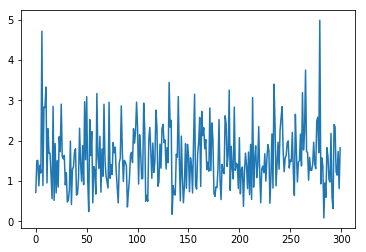

In [9]:
model=Model(drop_rate=0.5).cuda()
model.load_state_dict(torch.load("model_training.ckpt"))

# validation model
x=[]
y=[]
total_step = len(validate_loader)
for epoch in range(num_epochs):
    
    for i, (images, labels,_,hog_features) in enumerate(validate_loader):
        images=images.cuda()
        labels=labels.cuda()
        hog_features=hog_features.cuda()

        outputs = model(images,hog_features,len(images))
        _, predicted = torch.max(outputs.data, 1)       
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
               .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        # Decay learning rate
        if (epoch+1) % 10 == 0:
            curr_lr /= 2
            update_lr(optimizer, curr_lr)
            torch.save(model.state_dict(), 'model_validation.ckpt')
    x.append(epoch)
    y.append(loss.item())
plt.plot(x,y)
plt.show()
    
torch.save(model.state_dict(), 'model_validation.ckpt')
del model, labels, hog_features

In [15]:
model=Model(drop_rate=1.0).cuda()
model.load_state_dict(torch.load("model_validation.ckpt"))

# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels,_,hog_features in test_loader:
        images = images.cuda()
        labels = labels.cuda()
        hog_features=hog_features.cuda()
        outputs = model(images,hog_features,len(images))
        _, predicted = torch.max(outputs.data, 1)
#         print(labels.size(0))
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
#         print(correct)    
    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

del model, images, labels

Test Accuracy of the model on the 10000 test images: 59.34800780161605 %
